
 # Производная на отрезке
    

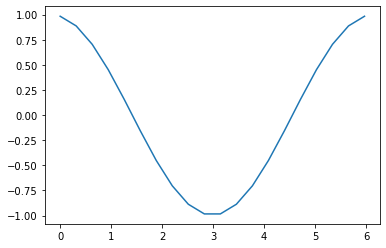

In [9]:
import math
import matplotlib.pyplot as plt

def get_diff(a,b,steps):
    y = []
    x = []
    step = (b - a)/steps
    while a < b:
        x.append(a)
        y.append((math.sin(a + step) - math.sin(a))/step)
        a += step
    plt.plot(x,y)
    
get_diff(0,2*math.pi,20)

# Численное интегрирование

Методы Ньютона-Котеса:



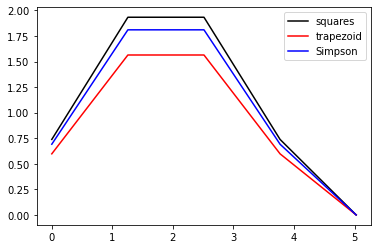

In [30]:
fig, ax = plt.subplots()
def Newton_Cotes(a,b,tau):
    step = (b - a)/tau
    result1,result2,result3 = 0,0,0
    x,y1,y2,y3 = [],[],[],[]
    while a < b:
        xav = (2*a + step)/2
        result1 += math.sin(xav)*step
        result2 += (math.sin(a) + math.sin(a + step))/2 * step
        result3 += step/6*(math.sin(a) + math.sin(a + step) + 4*math.sin(xav))
        x.append(a)
        y1.append(result1)
        y2.append(result2)
        y3.append(result3)
        a += step
    ax.plot(x,y1, color = "black", label = "squares")
    ax.plot(x,y2, color = "r",     label = "trapezoid")
    ax.plot(x,y3, color = "b",     label = "Simpson")

Newton_Cotes(0, 2*math.pi, 5)
ax.legend()
plt.show()
        
        

# Метод Рунге—Кутта

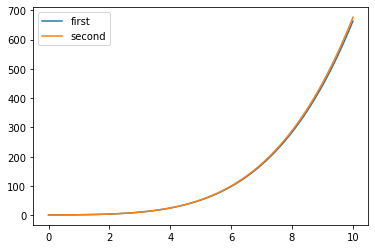

In [35]:
import numpy as np

def f(x,y):
    return x * np.sqrt(y)
def phi(x):
    return (x**2 + 4)**2/16
y0 = 1.0
a = 0
b = 10
tau = 0.1
n = int((b - a)/tau)

x = np.linspace(a,b,n)
y = np.zeros(n, float)
y[0] = y0

for i in range(1, n):
    k1 = f(x[i-1],y[i-1])
    k2 = f(x[i-1] + tau/2 ,y[i-1] + tau*k1/2)
    k3 = f(x[i-1] + tau/2 ,y[i-1] + tau*k2/2)
    k4 = f(x[i-1] + tau   ,y[i-1] + tau*k3)
    y[i] = y[i-1] + tau*(k1 + 2*k2 + 2*k3 + k4)/6

plt.plot(x,y,      label = "first")
plt.plot(x,phi(x), label = "second")
plt.legend()
plt.show()


    
             

# Явный метод Эйлера 


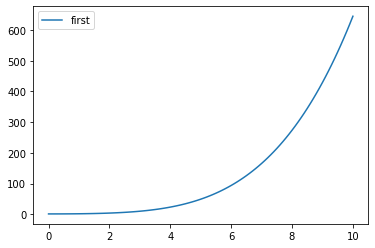

In [40]:
def f(x,y):
    return x*np.sqrt(y)

tau = 0.1
tmax = 10
u0 = 1
n = int(round(tmax/tau))


t = np.linspace(0, n*tau, n+1)
u = np.zeros(n+1, dtype = float)
u[0] = np.array(u0)
for i in range(n):
    u[i+1] = u[i] + tau*np.asarray(f(t[i], u[i]))
    
plt.plot(t,u,      label = "first")
plt.legend()
plt.show()
